In [127]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config InlineBackend.figure_formats = ['svg']
sns.set(style='whitegrid', context='notebook')

In [2]:
#import tables
ce_df = "click_events.csv"
cfge_df = "config_events.csv"
em_df = "email_events.csv"
users_df = "users.csv"
ve_df = "visit_events.csv"

In [3]:
#convert to dataframes
ce_df = pd.read_csv(ce_df)
cfge_df = pd.read_csv(cfge_df)
em_df = pd.read_csv(em_df)
users_df = pd.read_csv(users_df)
ve_df = pd.read_csv(ve_df)

Begin Data Investigation

In [4]:
ce_df.shape, cfge_df.shape, em_df.shape, users_df.shape, ve_df.shape

((6063, 3), (2308, 5), (20281, 11), (548, 2), (10669, 3))

In [5]:
ce_df.columns, cfge_df.columns, em_df.columns, users_df.columns, ve_df.columns

(Index(['user_id', 'time', 'page'], dtype='object'),
 Index(['user_id', 'time', 'event_name', 'skill', 'value'], dtype='object'),
 Index(['user_id', 'message_id', 'event_name', 'time', 'send_number', 'skill',
        'series_length', 'd', 'h', 'res_tag', 'trend'],
       dtype='object'),
 Index(['user_id', 'activated_at'], dtype='object'),
 Index(['user_id', 'time', 'page'], dtype='object'))

In [6]:
em_df.head()

,user_id,message_id,event_name,time,send_number,skill,series_length,d,h,res_tag,trend
0,-5Q1RnoZv1s5dnDnV0xwZg,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Delivery,1569924485,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up
1,-5Q1RnoZv1s5dnDnV0xwZg,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Open,1569928778,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up
2,-5Q1RnoZv1s5dnDnV0xwZg,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Delivery,1570529196,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down
3,-5Q1RnoZv1s5dnDnV0xwZg,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Open,1570542103,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down
4,-5Q1RnoZv1s5dnDnV0xwZg,0100016db6f26ccb-8e3b9fd7-2a12-4b4c-931b-e3d89...,Email Delivery,1570732406,NaN,NaN,NaN,4.0,18.0,monthlyLeadershipReport,NaN


Set index and convert data types

In [7]:
users_df['activated_at'] = pd.to_datetime(users_df['activated_at'], unit = 's')

In [8]:
em_df['time'] = pd.to_datetime(em_df['time'], unit = 's')

In [9]:
ce_df['time'] = pd.to_datetime(ce_df['time'], unit = 's')
cfge_df['time'] = pd.to_datetime(cfge_df['time'], unit = 's')
ve_df['time'] = pd.to_datetime(ve_df['time'], unit = 's')

In [10]:
users_df.set_index('user_id', inplace = True)

In [11]:
ce_df.set_index('user_id', inplace = True)
cfge_df.set_index('user_id', inplace = True)
em_df.set_index('user_id', inplace = True)
ve_df.set_index('user_id', inplace = True)

# 1) Email Engagement

TL;DR - Opportunity Series Email campaign was not successful, as less users triggered the link click event even though the amount of emails sent from both strategies is about the same amount. Which lowered engagement from the email entry point.

Overall the about the same amount of emails were sent with both strategies; however when going through the workflow of the overall users (delivery -> open -> click) the open rate is about the same, as visualized below. But when we look at link clicks, the opportunity series has a lower click through rate when looking through all the users email data. Recommendations would be to generate several hypothesis around testing the opportunity series emails and see of the users that engaged what features were they engaging with and test those on the suggested action email strategy.

TL;DR - There is a sustained interest in the data when you examine it from a macro level. Users are opening and clicking through the delivered emails. This can also be seen when breaking it down by the skills column and the series the email was in.

There was an outlier of a campaign having a 4 email long series, I dropped that since it was affecting the click through rates I was calculating. When dropping the outlier there is a noticeable pickup engagment as the series goes on. There are several skills that have the pattern of a bell curve going from delivery to opened (ValueOpinions, Worklifebalance, etc). But when looking at the user clicking past the email there is a clear pickup in engagement.

In [12]:
em_eng = users_df.join(em_df, how = 'left')

In [13]:
em_eng.shape, em_eng.columns

((20311, 11),
 Index(['activated_at', 'message_id', 'event_name', 'time', 'send_number',
        'skill', 'series_length', 'd', 'h', 'res_tag', 'trend'],
       dtype='object'))

In [14]:
em_eng.head()

,activated_at,message_id,event_name,time,send_number,skill,series_length,d,h,res_tag,trend
user_id,,,,,,,,,,,
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Delivery,2019-10-01 10:08:05,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Open,2019-10-01 11:19:38,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Delivery,2019-10-08 10:06:36,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Open,2019-10-08 13:41:43,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016db6f26ccb-8e3b9fd7-2a12-4b4c-931b-e3d89...,Email Delivery,2019-10-10 18:33:26,NaN,NaN,NaN,4.0,18.0,monthlyLeadershipReport,NaN


In [15]:
em_eng.isnull().sum()

activated_at         0
message_id          30
event_name          30
time                30
send_number      13355
skill             5201
series_length    13355
d                   30
h                   30
res_tag             30
trend            13699
dtype: int64

Breakout the email series of interest for analysis

In [16]:
ex_1 = em_eng.loc[em_eng['res_tag'].isin(['hbrWeeklyEmail','suggestedAction','opportunity series'])]

In [ ]:
ex_1['Date'] = [datetime.datetime.date(d) for d in ex_1['time']]
ex_1['cor_time'] = [datetime.datetime.time(d) for d in ex_1['time']]

In [18]:
ex_1.head()

,activated_at,message_id,event_name,time,send_number,skill,series_length,d,h,res_tag,trend,Date,cor_time
user_id,,,,,,,,,,,,,
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Delivery,2019-10-01 10:08:05,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up,2019-10-01,10:08:05
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Open,2019-10-01 11:19:38,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up,2019-10-01,11:19:38
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Delivery,2019-10-08 10:06:36,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down,2019-10-08,10:06:36
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Open,2019-10-08 13:41:43,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down,2019-10-08,13:41:43
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016dcedfbfaa-8358f851-214b-4f21-babc-b177b...,Email Delivery,2019-10-15 10:03:55,NaN,CoachingNeedy,NaN,2.0,10.0,hbrWeeklyEmail,down,2019-10-15,10:03:55


In [19]:
ex_del = ex_1[ex_1['event_name']=='Email Delivery'].groupby(['res_tag']).count()['message_id']
ex_open = ex_1[ex_1['event_name']=='Email Open'].groupby(['res_tag']).count()['message_id']
ex_click = ex_1[ex_1['event_name']=='Email Click'].groupby(['res_tag']).count()['message_id']

Visualize Open and click through rate for email series

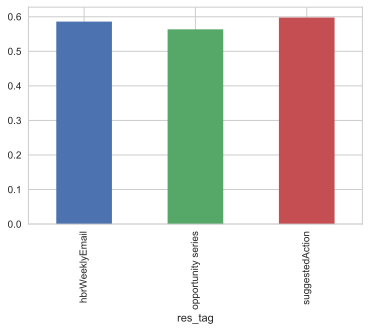

In [128]:
(ex_open / ex_del).plot(kind='bar')

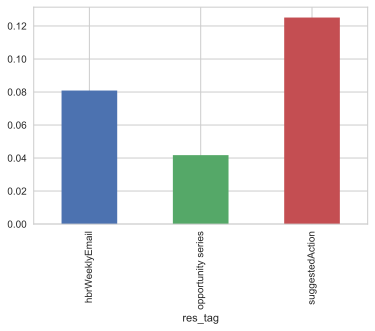

In [129]:
(ex_click / ex_del).plot(kind='bar')

Drop nulls and remove outlier from data set

In [ ]:
ex_1.dropna(subset=['send_number', 'series_length'],inplace=True)

In [23]:
ex_1 = ex_1.loc[ex_1['send_number'] < 4]

In [24]:
ex_1.shape

(6950, 13)

In [25]:
ex_1.head()

,activated_at,message_id,event_name,time,send_number,skill,series_length,d,h,res_tag,trend,Date,cor_time
user_id,,,,,,,,,,,,,
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016dd9cfd67b-bc20d5cd-8b7f-4199-a60c-e6904...,Email Delivery,2019-10-17 13:02:24,1.0,WorkLifeBalance,3.0,4.0,13.0,opportunity series,NaN,2019-10-17,13:02:24
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016dd9cfd67b-bc20d5cd-8b7f-4199-a60c-e6904...,Email Open,2019-10-17 13:06:36,1.0,WorkLifeBalance,3.0,4.0,13.0,opportunity series,NaN,2019-10-17,13:06:36
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016e1279404d-a0210791-f68b-458f-823c-b22a8...,Email Delivery,2019-10-28 13:06:09,2.0,WorkLifeBalance,3.0,1.0,13.0,opportunity series,NaN,2019-10-28,13:06:09
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016e1279404d-a0210791-f68b-458f-823c-b22a8...,Email Open,2019-10-28 14:26:46,2.0,WorkLifeBalance,3.0,1.0,13.0,opportunity series,NaN,2019-10-28,14:26:46
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:49,0100016e462d401b-2a20f667-8719-4d69-852c-f81ea...,Email Click,2019-11-07 14:33:28,3.0,WorkLifeBalance,3.0,4.0,14.0,opportunity series,NaN,2019-11-07,14:33:28


In [26]:
ex_sdel = ex_1[ex_1['event_name']=='Email Delivery'].groupby(['send_number']).count()['message_id']
ex_sopen = ex_1[ex_1['event_name']=='Email Open'].groupby(['send_number']).count()['message_id']
ex_sclick = ex_1[ex_1['event_name']=='Email Click'].groupby(['send_number']).count()['message_id']

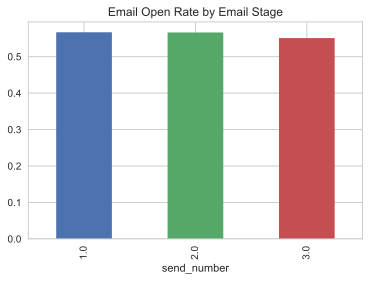

In [145]:
(ex_sopen / ex_sdel).plot(kind='bar', title = 'Email Open Rate by Email Stage')

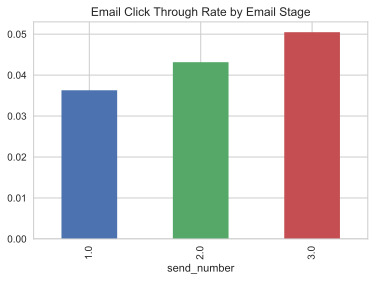

In [144]:
(ex_sclick / ex_sdel).plot(kind='bar',title = 'Email Click Through Rate by Email Stage')

In [29]:
ex_ssdel = ex_1[ex_1['event_name']=='Email Delivery'].groupby(['skill','send_number']).count()['message_id']
ex_ssopen = ex_1[ex_1['event_name']=='Email Open'].groupby(['skill','send_number']).count()['message_id']
ex_ssclick = ex_1[ex_1['event_name']=='Email Click'].groupby(['skill','send_number']).count()['message_id']


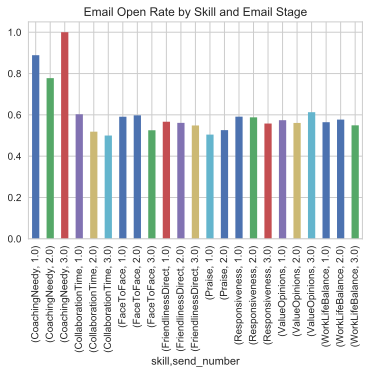

In [143]:
(ex_ssopen / ex_ssdel).plot(kind='bar',title = 'Email Open Rate by Skill and Email Stage')

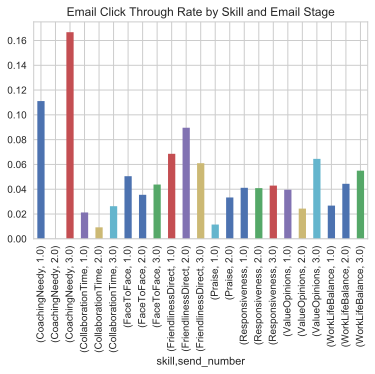

In [142]:
(ex_ssclick / ex_ssdel).plot(kind='bar',title = 'Email Click Through Rate by Skill and Email Stage')

# 2) Dashboard Engagement

TL;DR - Of the 548 users observed in this data set, about 405 of them are coming to the dashboard at some point in their journey through the emails that are being sent out. That is a sizable amount of the observations. 

By purely looking at the visit events along with the emails table we can see that the amount of unique users that triggered an email trigger event is about 405 users. By purely looking here we can see that many people are using the emails as an avenue to begin their journey on the product. One thing that would be super helpful and provide deeper insight is the usage of web analytics that would actually tag the channel they came in from and catch other behaviors like bounce, page depth, etc.

TL;DR - There seems to be a relationship between the amount of emails the user receives and how often they interact with the dashboard. All configuration events, click events, and visits to the page are all positively correlated with the amount of messages a user gets overall. 

I grouped all the users that interacted with emails and interacted with the dashboard from there with a left join (email being left and corresponding event tables on the right) this was for readability in the notebook, and when I tried merging it all together the dimensionality of the table got to large for any reasonable analysis. I used the raw count and grouped it by user since we are trying to understand how users behave. 

In [32]:
ce_df.head()

,time,page
user_id,,
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:10,onboarding
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:28,onboarding
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:30,onboarding
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:29:07,onboarding
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:29:20,onboarding


In [33]:
cfge_df.head()

,time,event_name,skill,value
user_id,,,,
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:29:21,Work Hours Set,NaN,NaN
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-28 01:31:30,Configuration Set,Responsiveness,neutral
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-28 01:31:39,Configuration Set,Communication Frequency,neutral
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-28 01:31:51,Configuration Set,1 on 1 Meeting Time,neutral
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-28 01:32:06,Configuration Set,Giving Recognition,neutral


In [34]:
em_df.head()

,message_id,event_name,time,send_number,skill,series_length,d,h,res_tag,trend
user_id,,,,,,,,,,
-5Q1RnoZv1s5dnDnV0xwZg,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Delivery,2019-10-01 10:08:05,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up
-5Q1RnoZv1s5dnDnV0xwZg,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Open,2019-10-01 11:19:38,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up
-5Q1RnoZv1s5dnDnV0xwZg,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Delivery,2019-10-08 10:06:36,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down
-5Q1RnoZv1s5dnDnV0xwZg,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Open,2019-10-08 13:41:43,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down
-5Q1RnoZv1s5dnDnV0xwZg,0100016db6f26ccb-8e3b9fd7-2a12-4b4c-931b-e3d89...,Email Delivery,2019-10-10 18:33:26,NaN,NaN,NaN,4.0,18.0,monthlyLeadershipReport,NaN


In [35]:
ve_df.head()

,time,page
user_id,,
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:07,onboarding
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:10,onboarding
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:28,onboarding
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:51,onboarding
-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:51,onboarding


In [36]:
ce_df.shape

(6063, 2)

In [37]:
cfge_df.shape

(2308, 4)

In [38]:
em_df.shape

(20281, 10)

In [39]:
ve_df.shape

(10669, 2)

Create table for email and session data to understand relationship, reduce duplicates by using time and id

In [40]:
ve_df.reset_index(inplace=True)
em_df.reset_index(inplace=True)
visit_email = pd.merge(ve_df, em_df, how = 'left', left_on = ['user_id', 'time'], right_on = ['user_id', 'time'], suffixes = ('_visit','_email'))

In [41]:
visit_email.shape

(10674, 12)

In [42]:
visit_email.shape

(10674, 12)

In [44]:
visit_email.head()

,user_id,time,page,message_id,event_name,send_number,skill,series_length,d,h,res_tag,trend
0,-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:07,onboarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:10,onboarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:28,onboarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:51,onboarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-5Q1RnoZv1s5dnDnV0xwZg,2019-09-27 16:28:51,onboarding,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
visit_email.user_id.nunique()

405

Count unique users in that table against the amount of users on the user table

In [45]:
users_df.reset_index(inplace=True)
users_df.user_id.nunique()
#405 out of 548 users have used the email click as a way to get to the page

548

In [ ]:
em_df.set_index('user_id',inplace = True)

**Begin investigating the relationship between dashboard and email engagement**

In [108]:
ex_2 = em_df.join(ve_df, how = 'left', lsuffix = "_email",rsuffix = '_visit')

In [117]:
test = ex_2.groupby('user_id').count()
test.reset_index(inplace = True)

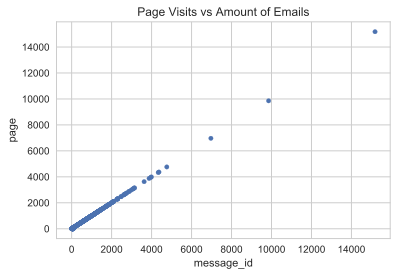

In [140]:
test.plot.scatter(x = 'message_id', y = 'page', title = 'Page Visits vs Amount of Emails')

In [119]:
ex_2 = em_df.join(ce_df, how = 'left', lsuffix = "_email",rsuffix = '_click')

In [120]:
clicks = ex_2.groupby('user_id').count()
clicks.reset_index(inplace = True)

In [ ]:
test.plot.scatter(x = 'message_id', y = 'page')

In [ ]:
ve_df.set_index('user_id', inplace = True)
ce_df.set_index('user_id', inplace = True)

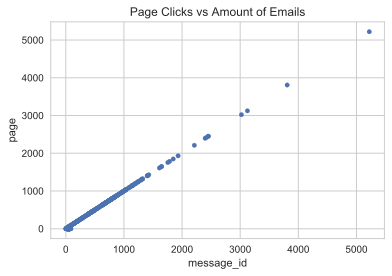

In [141]:
clicks.plot.scatter(x = 'message_id', y = 'page', title = 'Page Clicks vs Amount of Emails')

In [123]:
ex_2 = em_df.join(cfge_df, how = 'left', lsuffix = "_email",rsuffix = '_config')

In [124]:
config = ex_2.groupby('user_id').count()
config.reset_index(inplace = True)
config.head()

,user_id,message_id,event_name_email,time_email,send_number,skill_email,series_length,d,h,res_tag,trend,time_config,event_name_config,skill_config,value
0,-5Q1RnoZv1s5dnDnV0xwZg,288,288,288,99,198,99,288,288,288,99,288,288,256,256
1,-9kFTbB6HVlbobgpFs-fUg,58,58,58,19,44,19,58,58,58,21,0,0,0,0
2,-D1EFmhZyIkPiNDaI_ItLw,378,378,378,224,301,224,378,378,378,49,378,378,270,270
3,-JSJF6FEwIRnpcldwtbGrg,51,51,51,16,37,16,51,51,51,18,51,51,0,0
4,-QKWTntNpeX8n8Q254Md5Q,176,176,176,58,134,58,176,176,176,64,176,176,176,0


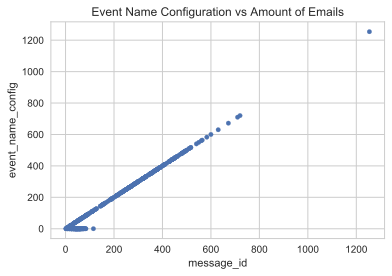

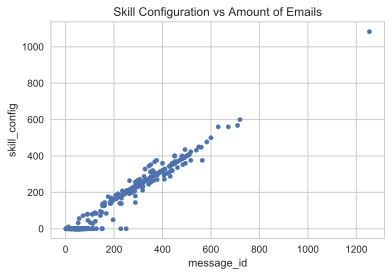

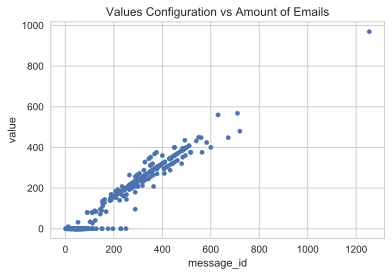

In [139]:
config.plot.scatter(x = 'message_id', y = 'event_name_config', title = 'Event Name Configuration vs Amount of Emails'),
config.plot.scatter(x = 'message_id', y = 'skill_config',title = 'Skill Configuration vs Amount of Emails'),
config.plot.scatter(x = 'message_id', y = 'value', title = 'Values Configuration vs Amount of Emails')

# 3) Timing

TL;DR - Tuesdays around 6 o'clock seems to have the best email open rate and click through rate when analyzing the data.

After joining the session data with the email data on time and user id because of many to many relationship with the emails and web session data. The merge allowed for a join on multiple columns and reduce the amount of possible duplicate records. Then I broke it down by email stage. 

In [148]:
ex_3 = pd.merge(em_df,ve_df,
                left_on = ['user_id', 'time'], right_on = ['user_id', 'time'],
                how = 'left', suffixes =("_email", '_visit'))

In [150]:
ex_3.head()

,message_id,event_name,time,send_number,skill,series_length,d,h,res_tag,trend,page
user_id,,,,,,,,,,,
-5Q1RnoZv1s5dnDnV0xwZg,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Delivery,2019-10-01 10:08:05,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up,NaN
-5Q1RnoZv1s5dnDnV0xwZg,0100016d86ca8af5-bf676b07-6713-424a-ab9d-89c93...,Email Open,2019-10-01 11:19:38,NaN,ValueOpinions,NaN,2.0,10.0,hbrWeeklyEmail,up,NaN
-5Q1RnoZv1s5dnDnV0xwZg,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Delivery,2019-10-08 10:06:36,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down,NaN
-5Q1RnoZv1s5dnDnV0xwZg,0100016daad5b1d1-e457312d-3aa7-4920-8236-36a32...,Email Open,2019-10-08 13:41:43,NaN,FriendlinessDirect,NaN,2.0,10.0,hbrWeeklyEmail,down,NaN
-5Q1RnoZv1s5dnDnV0xwZg,0100016db6f26ccb-8e3b9fd7-2a12-4b4c-931b-e3d89...,Email Delivery,2019-10-10 18:33:26,NaN,NaN,NaN,4.0,18.0,monthlyLeadershipReport,NaN,NaN


In [151]:
ex_3del = ex_1[ex_1['event_name']=='Email Delivery'].groupby(['d']).count()['message_id']
ex_3open = ex_1[ex_1['event_name']=='Email Open'].groupby(['d']).count()['message_id']
ex_3click = ex_1[ex_1['event_name']=='Email Click'].groupby(['d']).count()['message_id']

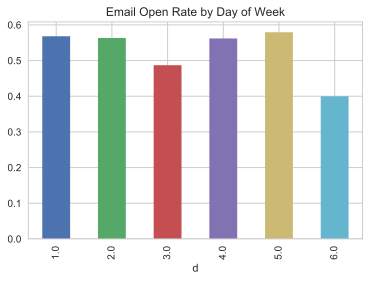

In [152]:
(ex_3open / ex_3del).plot(kind='bar',title = 'Email Open Rate by Day of Week')

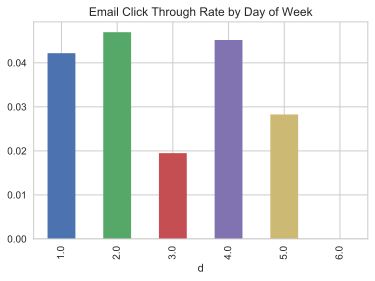

In [153]:
(ex_3click / ex_3del).plot(kind='bar',title = 'Email Click Through Rate by Day of Week')

In [154]:
ex_3hdel = ex_1[ex_1['event_name']=='Email Delivery'].groupby(['h']).count()['message_id']
ex_3hopen = ex_1[ex_1['event_name']=='Email Open'].groupby(['h']).count()['message_id']
ex_3hclick = ex_1[ex_1['event_name']=='Email Click'].groupby(['h']).count()['message_id']

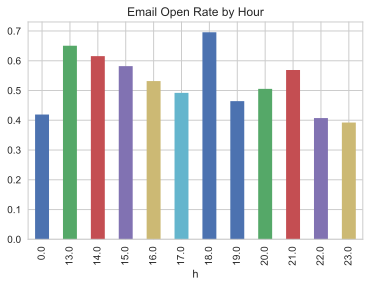

In [155]:
(ex_3hopen / ex_3hdel).plot(kind='bar',title = 'Email Open Rate by Hour')

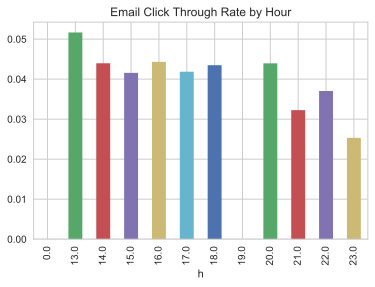

In [156]:
(ex_3hclick / ex_3hdel).plot(kind='bar',title = 'Email Click Through Rate by Hour')